<a href="https://www.kaggle.com/code/argha20/getting-started-with-eda?scriptVersionId=198998885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Understanding EDA
**Objectives**

0. Importing necessary libs
1. Data Import & Understanding
2. Data Preperation
3. Feature Understanding
4. Feature Relationship
5. Ask Questions about the data 

## 0. Importing necessary libs

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

## 1. Data Import & Understanding

In [2]:
# Concat all the datasets into a single dataset and analyse that
all_files = []
for files in os.listdir("../input/practice-eda-on-this-sales-dataset"):
    print(files)
    all_files.append("../input/practice-eda-on-this-sales-dataset/"+files)

print(all_files)
    

Sales_August_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv
['../input/practice-eda-on-this-sales-dataset/Sales_August_2019.csv', '../input/practice-eda-on-this-sales-dataset/Sales_May_2019.csv', '../input/practice-eda-on-this-sales-dataset/Sales_February_2019.csv', '../input/practice-eda-on-this-sales-dataset/Sales_November_2019.csv', '../input/practice-eda-on-this-sales-dataset/Sales_January_2019.csv', '../input/practice-eda-on-this-sales-dataset/Sales_March_2019.csv', '../input/practice-eda-on-this-sales-dataset/Sales_September_2019.csv', '../input/practice-eda-on-this-sales-dataset/Sales_April_2019.csv', '../input/practice-eda-on-this-sales-dataset/Sales_July_2019.csv', '../input/practice-eda-on-this-sales-dataset/Sales_October_2019.csv', '../input/practice-eda-on-this-sales-data

In [3]:
#df = pd.read_csv('../input/practice-eda-on-this-sales-dataset/Sales_April_2019.csv')
df = pd.concat(map(pd.read_csv, all_files))

In [4]:
# First glance of data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [5]:
# Checking Rows & Columns
df.shape

(186850, 6)

In [6]:
# Show all the columns available in this Dataset
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
#Checking dtypes of columns
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
# Checking on numeric data
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## Data Preperation

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [10]:
# Change Datatypes accordingly
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
# All the columns are necessary, so not dropping any

In [12]:
# Convert dtypes of columns accordingly
# df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
# df['Price Each'] = pd.to_numeric(df['Price Each'])
# df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
# Here we can see row = 211 contains wrong values
df.iloc[211]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 211, dtype: object

In [14]:
# drop row 211, as it's causing error in data conversion
df.drop(211)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [15]:
df.iloc[211]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 211, dtype: object

In [16]:
# Converting dtypes accordingly
# It suggest that, we have multiple incorrect value
# 


In [17]:
# df['Order Date'] = pd.to_datetime(df['Order Date'])

In [18]:
# We need to clean the data before we can convert, because of multiple values

#Check null values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [19]:
# Duplicated Value
df.loc[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
628,237276,Lightning Charging Cable,1,14.95,08/22/19 10:43,"446 2nd St, Boston, MA 02215"
925,237560,USB-C Charging Cable,1,11.95,08/09/19 00:26,"397 Lincoln St, San Francisco, CA 94016"
1222,NaN,NaN,NaN,NaN,NaN,NaN
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23996,NaN,NaN,NaN,NaN,NaN,NaN
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24222,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [20]:
df.loc[df.duplicated(subset=['Order ID'])]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016"
61,236729,Apple Airpods Headphones,1,150.0,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016"
63,236730,Wired Headphones,1,11.99,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001"
133,236799,Wired Headphones,1,11.99,08/01/19 12:38,"309 2nd St, San Francisco, CA 94016"
164,236829,USB-C Charging Cable,1,11.95,08/16/19 08:51,"27 2nd St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
24978,319536,Wired Headphones,1,11.99,12/16/19 09:59,"346 Elm St, Seattle, WA 98101"
24999,319556,Wired Headphones,1,11.99,12/22/19 08:23,"848 7th St, Austin, TX 73301"
25028,319584,Wired Headphones,1,11.99,12/11/19 00:30,"537 Sunset St, Portland, OR 97035"
25041,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001"


In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [22]:
# Renaming columns
df = df.rename(columns={'Order ID': 'Order_ID', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}).copy()


df.head()


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [23]:
# We will not drop any order id, because multiple orders have same id with different Product
df.query('Order_ID == "319596"')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
25040,319596,iPhone,1,700,12/01/19 08:44,"436 14th St, New York City, NY 10001"
25041,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001"


In [24]:
#Check if there exists same duplicate order
df.loc[df.duplicated(subset=['Order_ID', 'Product', 'Order_Date'])]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
628,237276,Lightning Charging Cable,1,14.95,08/22/19 10:43,"446 2nd St, Boston, MA 02215"
925,237560,USB-C Charging Cable,1,11.95,08/09/19 00:26,"397 Lincoln St, San Francisco, CA 94016"
1222,NaN,NaN,NaN,NaN,NaN,NaN
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23996,NaN,NaN,NaN,NaN,NaN,NaN
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24222,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [25]:
df.query('Order_ID == "Order ID"')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [26]:
# Since, we have some junk values, we'll need to drop them

# df = df.drop(df[df['product_name'] == 'Coca Cola'].index)
df = df.drop(df[df['Order_ID'] == 'Order ID'].index)

In [27]:
df.query('Order_ID == "Order ID"')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address


In [28]:
df.loc[df['Order_ID'].isna()]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Drop columns with NaN

df = df[df['Order_ID'].notna()]

In [30]:
df.loc[df['Order_ID'].isna()]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address


In [31]:
df.reset_index(drop = True)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
182730,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
182731,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
182732,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
182733,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [32]:
df.shape

(182735, 6)

In [33]:
# Converting data types accordingly
df['Quantity_Ordered'] = pd.to_numeric(df['Quantity_Ordered'], downcast = 'integer', errors = 'coerce')
df['Price_Each'] = pd.to_numeric(df['Price_Each'], downcast = 'float', errors = 'coerce')
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

/tmp/ipykernel_17/3547112675.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


In [34]:
df.dtypes

Order_ID                    object
Product                     object
Quantity_Ordered              int8
Price_Each                 float32
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

**Now, we have a dataset comprising of all the months, also the data are clean with column names formatted. Along with this, the data types of the columns are changed accordingly**

## Feature Understanding
  

Here, the main objectives are:
1. Univariate Analysis
2. Plotting Feature Distribution

In [35]:
 df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670,Wired Headphones,2,11.990000,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.989998,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.000000,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.840000,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.840000,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.840000,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.000000,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.990000,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [36]:
# Checking the most sold Product
df['Product'].value_counts()

Product
USB-C Charging Cable          21523
Lightning Charging Cable      21308
AAA Batteries (4-pack)        20293
AA Batteries (4-pack)         20214
Wired Headphones              18552
Apple Airpods Headphones      15273
Bose SoundSport Headphones    13109
27in FHD Monitor               7386
iPhone                         6725
27in 4K Gaming Monitor         6122
34in Ultrawide Monitor         6058
Google Phone                   5433
Flatscreen TV                  4705
Macbook Pro Laptop             4641
ThinkPad Laptop                4052
20in Monitor                   4032
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: count, dtype: int64

Text(0, 0.5, 'Product')

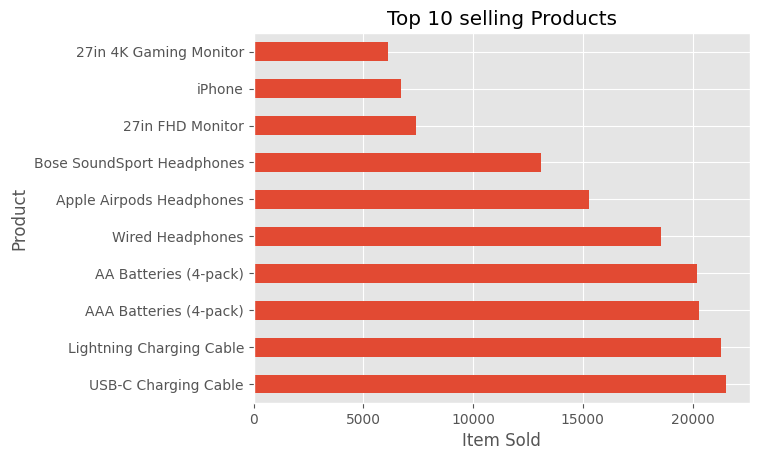

In [37]:
# Plotting the Top 10 sold Products
ax = df['Product'].value_counts() \
            .head(10) \
            .plot(kind = 'barh', title = 'Top 10 selling Products')
ax.set_xlabel('Item Sold')
ax.set_ylabel('Product')

In [38]:
pd.DatetimeIndex(df['Order_Date']).month.value_counts()

Order_Date
12    24680
10    19973
4     17984
11    17282
5     16284
3     14888
7     14032
6     13292
2     11726
8     11719
9     11375
1      9500
Name: count, dtype: int64

Text(0, 0.5, 'Quantity Sold')

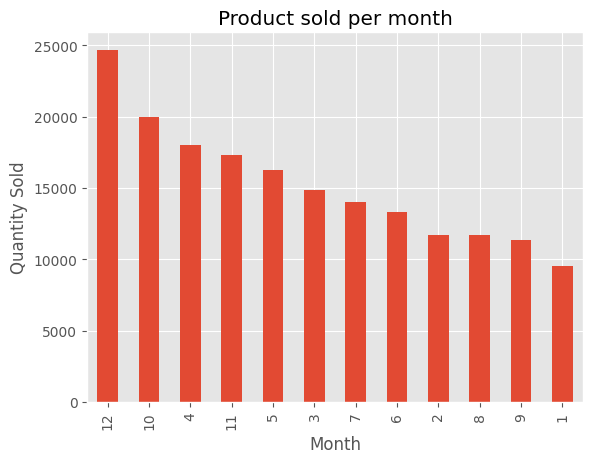

In [39]:
# Plotting the months by most orders

ax = pd.DatetimeIndex(df['Order_Date']).month \
                        .value_counts() \
                        .plot(kind = 'bar', title = 'Product sold per month')

ax.set_xlabel('Month')
ax.set_ylabel('Quantity Sold')

Text(0.5, 0, 'Price')

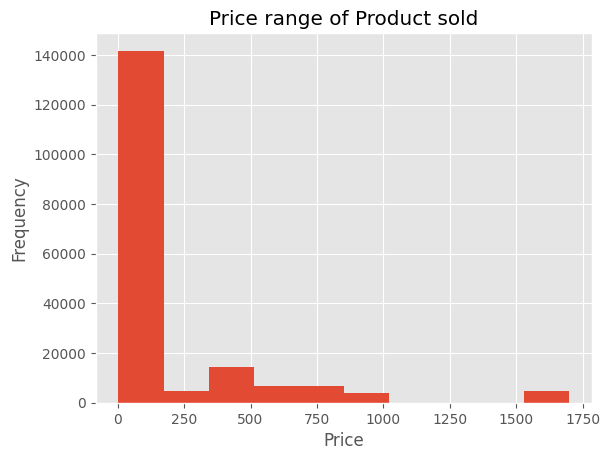

In [40]:
# Checking the price range of product sold
ax = df['Price_Each'].plot(kind = 'hist', bins = 10, title = 'Price range of Product sold')
ax.set_xlabel('Price')

Text(0.5, 0, 'Price')

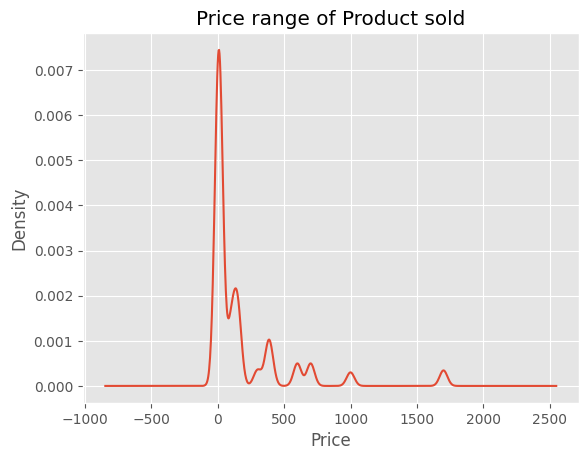

In [41]:
ax = df['Price_Each'].plot(kind = 'kde', title = 'Price range of Product sold')
ax.set_xlabel('Price')

## Feature Relationship

* Scatterplot
* Heatmap Relationship
* Pairplot
* Groupby Comparison

In [42]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670,Wired Headphones,2,11.990000,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.989998,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.000000,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.840000,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.840000,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.840000,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.000000,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.990000,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


<Figure size 9000x12000 with 0 Axes>

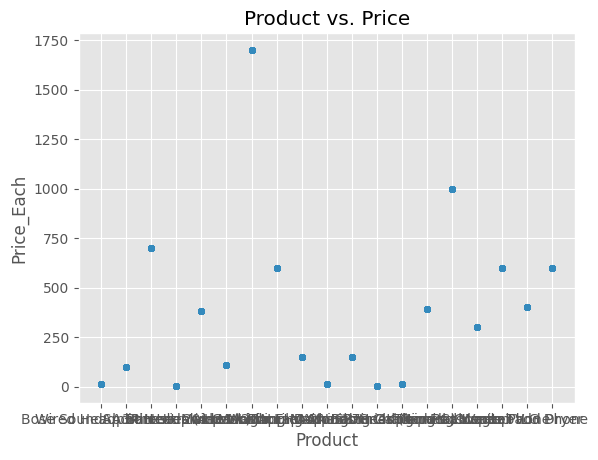

<Figure size 9000x12000 with 0 Axes>

In [43]:
# Product by Price, although the result is not clear,grouping the product and checking the price is important now
df.plot(kind = 'scatter',
        x = 'Product',
        y = 'Price_Each',
        title = 'Product vs. Price',
       )

plt.figure(figsize=(30,40), dpi=300)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


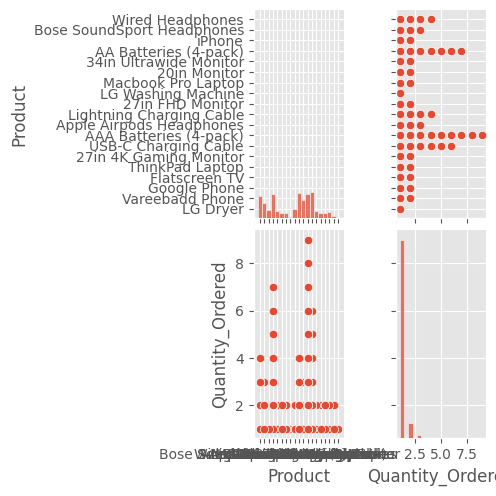

In [44]:
#Checking Relationship among multiple columns
sns.pairplot(df, vars = ['Product', 'Quantity_Ordered'])
plt.show()

In [45]:
# Checking correlation betweem 'Price_Each' & 'Quantity_Ordered'

df_corr = df[['Quantity_Ordered', 'Price_Each']].dropna().corr()
df_corr

,Quantity_Ordered,Price_Each
Quantity_Ordered,1.00000,-0.14813
Price_Each,-0.14813,1.00000


<Axes: >

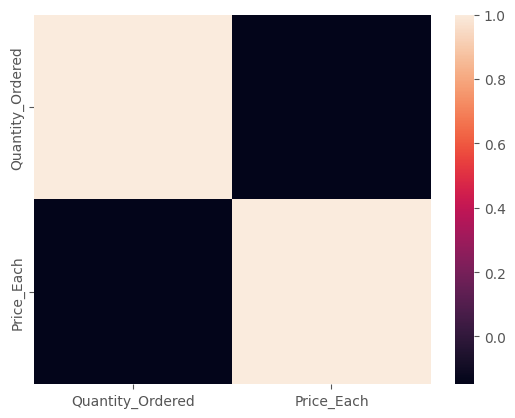

In [46]:
sns.heatmap(df_corr)

In [47]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670,Wired Headphones,2,11.990000,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.989998,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.000000,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.840000,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.840000,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.840000,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.000000,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.990000,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


## Ask Question about the Data

  Answer the questions about data using plots or statistics
  

Text(0, 0.5, 'Products sold')

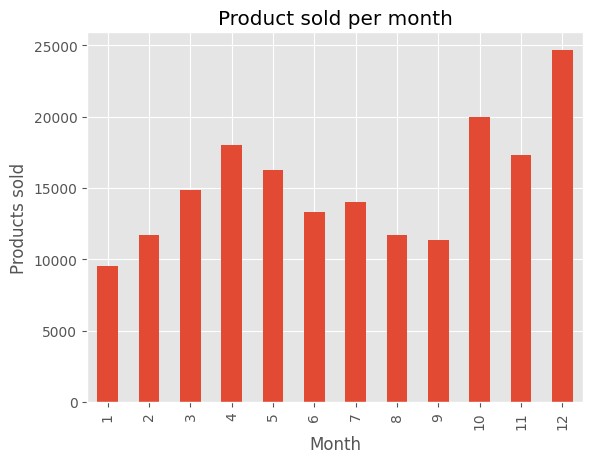

In [48]:
# What was the best month for sales? How much was earned that month?
ax = pd.DatetimeIndex(df['Order_Date']).month \
                    .value_counts().sort_index() \
                    .plot(kind = 'bar', title = 'Product sold per month')

ax.set_xlabel('Month')
ax.set_ylabel('Products sold')

In [49]:
# What city sold the most product?

In [50]:
#A coulmn for city needs to be extracted

df['City'] = df['Purchase_Address'].apply(lambda x: x.split(',')[1].strip())

In [51]:
df['City']

0              Seattle
1               Dallas
2             Portland
3          Los Angeles
4        New York City
             ...      
25112    San Francisco
25113      Los Angeles
25114          Seattle
25115           Dallas
25116      Los Angeles
Name: City, Length: 182735, dtype: object

In [52]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City
0,236670,Wired Headphones,2,11.990000,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle
1,236671,Bose SoundSport Headphones,1,99.989998,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas
2,236672,iPhone,1,700.000000,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland
3,236673,AA Batteries (4-pack),2,3.840000,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles
4,236674,AA Batteries (4-pack),2,3.840000,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City


Text(0, 0.5, 'Product Sold')

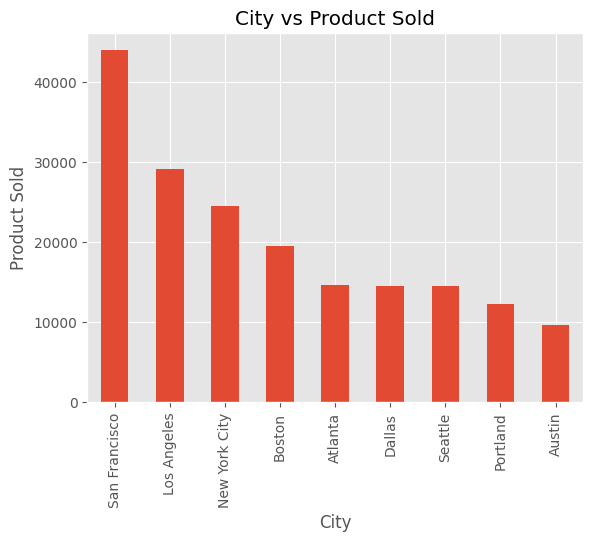

In [53]:
ax = df['City'].value_counts() \
                .plot(kind = 'bar', title = 'City vs Product Sold')

ax.set_xlabel('City')
ax.set_ylabel('Product Sold')

In [54]:
# What time should we display advertisements to maximize the likelihood of customers buying products?

df['Order_Time'] = pd.to_datetime(df['Order_Date']).dt.time

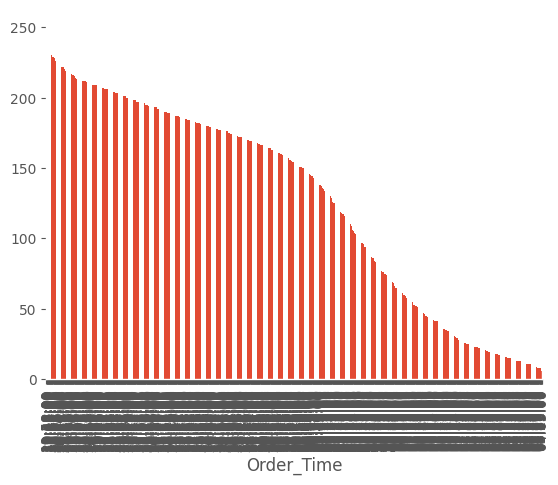

In [55]:
ax = df['Order_Time'].value_counts() \
                    .plot(kind = 'bar')

In [56]:
# What products are most often sold together?
df['Order_ID'].value_counts()

Order_ID
160873    5
312462    4
277875    4
212334    4
235798    4
         ..
146377    1
146378    1
146379    1
146380    1
319670    1
Name: count, Length: 175449, dtype: int64

In [57]:
df.loc[df['Order_ID'].isin(['160873'])]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,Order_Time
10836,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",San Francisco,10:24:00
10837,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",San Francisco,10:24:00
10838,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",San Francisco,10:24:00
10839,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",San Francisco,10:24:00
10840,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",San Francisco,10:24:00


In [58]:
df.loc[df['Order_ID'].isin(['312462'])]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,Order_Time
17577,312462,iPhone,1,700.00,2019-12-08 13:19:00,"210 Spruce St, San Francisco, CA 94016",San Francisco,13:19:00
17578,312462,Lightning Charging Cable,1,14.95,2019-12-08 13:19:00,"210 Spruce St, San Francisco, CA 94016",San Francisco,13:19:00
17579,312462,Apple Airpods Headphones,2,150.00,2019-12-08 13:19:00,"210 Spruce St, San Francisco, CA 94016",San Francisco,13:19:00
17580,312462,Wired Headphones,1,11.99,2019-12-08 13:19:00,"210 Spruce St, San Francisco, CA 94016",San Francisco,13:19:00


In [59]:
# What product sold the most? Why do you think it sold the most?

df['Product'].value_counts()

Product
USB-C Charging Cable          21523
Lightning Charging Cable      21308
AAA Batteries (4-pack)        20293
AA Batteries (4-pack)         20214
Wired Headphones              18552
Apple Airpods Headphones      15273
Bose SoundSport Headphones    13109
27in FHD Monitor               7386
iPhone                         6725
27in 4K Gaming Monitor         6122
34in Ultrawide Monitor         6058
Google Phone                   5433
Flatscreen TV                  4705
Macbook Pro Laptop             4641
ThinkPad Laptop                4052
20in Monitor                   4032
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: count, dtype: int64